# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=3a4d34abd2115666d35385fd9a39515af46920b6a5a96630a4bf29bddbdfcf5d
  Stored in directory: c:\users\samue\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy


In [7]:
pip show kdtree

Name: kdtree
Version: 0.16
Summary: A Python implemntation of a kd-tree
Home-page: https://github.com/stefankoegl/kdtree
Author: Stefan Kögl
Author-email: stefan@skoegl.net
License: ISC license
Location: c:\users\samue\miniconda3\envs\pythondata\lib\site-packages
Requires: 
Required-by: citipy
Note: you may need to restart the kernel to use updated packages.


In [62]:
#Dependencies

import json
import requests
from citipy import citipy
import kdtree
import time
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import datetime
from config import api_key

#output data
output_file = 'output_data/cities.csv'


In [36]:
#Testing citipy functionality
lats=[(34.57, 109.75), (70.45, -39.90), (174.82, 9.45), (-64.20, 67.02)]
# longs=[]

city_names =[]
for i , j in lats:
#     print(i, j)
    city = citipy.nearest_city(i,j).city_name
    city_names.append(city)


print(city_names)
    

['weinan', 'tasiilaq', 'longyearbyen', 'taolanaro']


In [9]:
#Generating city list

#General information
#latitude is 90 degrees north and south
#longitude is 180 degrees east and west 

#using numpy to generate random evenly distributed number sets between (-90,90) and (-180,180) 
#using 1200 size data because if coordinates are too close will generate duplicates
lat = list(np.random.uniform(low=-90,high=90, size=1500))
long = list(np.random.uniform(low=-180,high=180, size=1500))

#zipping together and transforming to list as zip output is not iterable
city_loc = zip(lat, long)
city_loc = list(city_loc)

#Create empty list to hold list of cities
cities = []

#looping through zipped list of tuples that that will generate city name
for i, j in city_loc:
    city = citipy.nearest_city(i, j).city_name
    
    if city not in cities:
        cities.append(city)



#Confirming the number of cities generated
print(len(cities))





607


In [84]:
#creating api/config information
url = 'http://api.openweathermap.org/data/2.5/weather?'
# url = 'http://api.openweathermap.org/data/2.5/find?'

#api.openweathermap.org/data/2.5/find?q=London&units=imperial

#build query URL
query_url = url+"appid="+api_key+"&units=imperial"+"&q="

print(query_url)

#testing pull from api
response = requests.get(query_url + 'oktyabrskiy').json()
response

http://api.openweathermap.org/data/2.5/weather?appid=2bb07b5b4cb41ed42f006f21f0e71510&units=imperial&q=


{'coord': {'lon': 53.47, 'lat': 54.48},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 56.17,
  'feels_like': 46.29,
  'temp_min': 56.17,
  'temp_max': 56.17,
  'pressure': 1009,
  'humidity': 73,
  'sea_level': 1009,
  'grnd_level': 993},
 'visibility': 10000,
 'wind': {'speed': 16.6, 'deg': 306},
 'clouds': {'all': 100},
 'dt': 1600849188,
 'sys': {'country': 'RU', 'sunrise': 1600827228, 'sunset': 1600870985},
 'timezone': 18000,
 'id': 515879,
 'name': "Oktyabr'skiy",
 'cod': 200}

## Generate Cities List

In [17]:
print(len(cities))
print(cities)

607
['taolanaro', 'khatanga', 'rikitea', 'narsaq', 'saryshagan', 'butaritari', 'bambous virieux', 'avarua', 'barrow', 'hobart', 'miles city', 'busselton', 'taoudenni', 'nagua', 'tuktoyaktuk', 'derzhavinsk', 'jamestown', 'nicoya', 'pisco', 'oyama', 'clyde river', 'tsihombe', 'albany', 'rawson', 'punta arenas', 'nikolskoye', 'montepuez', 'port alfred', 'east london', 'hilo', 'ushuaia', 'acarau', 'chapais', 'umm lajj', 'lebu', 'esperance', 'lorengau', 'pangnirtung', 'bluff', 'dingle', 'yellowknife', 'grand gaube', 'sitka', 'lata', 'ushtobe', 'nacala', 'geraldton', 'qaanaaq', 'krasnorechenskiy', 'kapaa', 'belushya guba', 'saint-philippe', 'san cristobal', 'kodiak', 'minab', 'nizhneyansk', 'hostotipaquillo', 'waiuku', 'longlac', 'asau', 'atherton', 'severo-kurilsk', 'nemuro', 'mataura', 'ballina', 'thompson', 'dikson', 'jurm', 'kijang', 'cap malheureux', 'conceicao do araguaia', 'vaini', 'amos', 'melfi', 'awbari', 'slave lake', 'canico', 'acuna', 'okha', 'huazolotitlan', 'carnarvon', 'semme

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [85]:
#Pulling data via API

#creating empty list for variables returned from API
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
max_temp = []
lng = []
country = []
date = []


count = 0
set_num = 1
city_list2 =[]

print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        max_temp.append(response['main']['temp_max'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        
        if count >= 49:
            count = 1
            set_num = set_num + 1
            city_list2.append(city)
            
        else:
            count = count + 1
            city_list2.append(city)
            
        
        print(f'Processing record {count} of set {set_num} | {city}')
    except Exception:
        print('City not found. skipping ...')

print('-----------------------------')
print('data retrieval complete')            



Beginning Data Retrieval
-----------------------------
City not found. skipping ...
Processing record 1 of set 1 | khatanga
Processing record 2 of set 1 | rikitea
Processing record 3 of set 1 | narsaq
City not found. skipping ...
Processing record 4 of set 1 | butaritari
Processing record 5 of set 1 | bambous virieux
Processing record 6 of set 1 | avarua
Processing record 7 of set 1 | barrow
Processing record 8 of set 1 | hobart
Processing record 9 of set 1 | miles city
Processing record 10 of set 1 | busselton
Processing record 11 of set 1 | taoudenni
Processing record 12 of set 1 | nagua
Processing record 13 of set 1 | tuktoyaktuk
Processing record 14 of set 1 | derzhavinsk
Processing record 15 of set 1 | jamestown
Processing record 16 of set 1 | nicoya
Processing record 17 of set 1 | pisco
Processing record 18 of set 1 | oyama
Processing record 19 of set 1 | clyde river
City not found. skipping ...
Processing record 20 of set 1 | albany
Processing record 21 of set 1 | rawson
Process

Processing record 37 of set 4 | bianzhuang
Processing record 38 of set 4 | brasileia
Processing record 39 of set 4 | the pas
Processing record 40 of set 4 | nome
Processing record 41 of set 4 | yulara
City not found. skipping ...
Processing record 42 of set 4 | ondjiva
Processing record 43 of set 4 | bandarbeyla
Processing record 44 of set 4 | saint-georges
Processing record 45 of set 4 | souillac
Processing record 46 of set 4 | pirgos
Processing record 47 of set 4 | puerto ayora
Processing record 48 of set 4 | saldanha
Processing record 49 of set 4 | padang
Processing record 1 of set 5 | coahuayana
City not found. skipping ...
Processing record 2 of set 5 | venice
Processing record 3 of set 5 | san ignacio
City not found. skipping ...
Processing record 4 of set 5 | saquarema
Processing record 5 of set 5 | sioux lookout
Processing record 6 of set 5 | vao
Processing record 7 of set 5 | itaituba
Processing record 8 of set 5 | jasper
Processing record 9 of set 5 | ponta delgada
Processing

Processing record 32 of set 8 | yarada
Processing record 33 of set 8 | owensboro
Processing record 34 of set 8 | nieuw amsterdam
Processing record 35 of set 8 | isla mujeres
Processing record 36 of set 8 | bereznik
Processing record 37 of set 8 | haikou
Processing record 38 of set 8 | matamoros
City not found. skipping ...
Processing record 39 of set 8 | north bend
Processing record 40 of set 8 | nhamunda
Processing record 41 of set 8 | iqaluit
City not found. skipping ...
Processing record 42 of set 8 | dibai
Processing record 43 of set 8 | luba
Processing record 44 of set 8 | gwadar
Processing record 45 of set 8 | batagay-alyta
Processing record 46 of set 8 | santa pola
City not found. skipping ...
Processing record 47 of set 8 | plettenberg bay
Processing record 48 of set 8 | kemijarvi
Processing record 49 of set 8 | rathkeale
Processing record 1 of set 9 | yining
Processing record 2 of set 9 | hachinohe
Processing record 3 of set 9 | broome
Processing record 4 of set 9 | bogashevo


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [86]:
#creating dictionary with data pulled from api
cities_dict={"City":city_list2,
             "Cloudiness":cloudiness,
             "Country":country,
             "Date":date,
             "Humidity":humidity,
             "Latitude":lat,
             "Longitude":lng,
             "Max Temp":max_temp,
             "Wind Speed":wind_speed}

cities_df=pd.DataFrame(cities_dict)
print(cities_df.shape)
cities_df.head()

(551, 9)


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,khatanga,0,RU,1600849292,46,71.97,102.50,55.60,18.54
1,rikitea,10,PF,1600849293,75,-23.12,-134.97,72.39,16.37
2,narsaq,0,GL,1600849293,78,60.92,-46.05,32.00,10.29
3,butaritari,2,KI,1600849293,77,3.07,172.79,82.04,13.22
4,bambous virieux,40,MU,1600849293,61,-20.34,57.76,77.00,11.41


In [87]:
#calc for summary stats for df
sum_df = cities_df[['Latitude', 'Longitude', 'Max Temp', 'Humidity', 
                    'Cloudiness','Wind Speed','Date']].agg(['mean','std','max','min','count'])

#calc for quartiles
qrlt_df = cities_df[['Latitude', 'Longitude', 'Max Temp', 'Humidity', 
                     'Cloudiness','Wind Speed','Date']].quantile([.25, .5, .75])

#inserting rows for quartiles
sum_df.loc['25th'] = qrlt_df.loc[.25]
sum_df.loc['50th'] = qrlt_df.loc[.5]
sum_df.loc['75th'] = qrlt_df.loc[.75]

#calling df
sum_df

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
mean,21.402541,13.160998,65.942577,70.346642,48.912886,8.131815,1.600849e+09
std,32.960886,90.760940,16.422732,21.352998,39.701931,5.556598,5.837156e+01
max,78.220000,179.320000,110.080000,100.000000,100.000000,31.470000,1.600849e+09
min,-54.800000,-179.170000,11.710000,7.000000,0.000000,0.400000,1.600849e+09
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
25th,-4.000000,-67.685000,53.010000,61.000000,2.500000,3.990000,1.600849e+09
50th,26.180000,17.940000,68.000000,76.000000,44.000000,6.930000,1.600849e+09
75th,49.265000,85.160000,78.800000,86.000000,90.000000,11.030000,1.600849e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [89]:
#there are no cities in my data set with a humidity
#above 100 but the below have a humidity of excatly 100
# going to skip steps involing
cities_df[cities_df['Humidity'] >= 100]


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
73,semme,90,FR,1600849307,100,46.20,1.50,61.00,8.05
115,polson,39,US,1600849314,100,47.69,-114.16,46.00,1.99
154,torbay,90,CA,1600849321,100,47.67,-52.73,61.00,24.16
258,lasa,75,IT,1600849338,100,46.62,10.70,57.99,1.23
278,madison,90,US,1600849128,100,34.73,-86.57,59.00,3.36
279,shelburne,1,CA,1600849341,100,44.08,-80.20,53.01,9.10
280,fortuna,1,US,1600849089,100,40.60,-124.16,55.00,6.93
320,alofi,100,NU,1600849347,100,-19.06,-169.92,68.00,3.36
332,lively,20,CA,1600849350,100,46.43,-81.15,51.01,5.82
345,escanaba,1,US,1600849351,100,45.75,-87.06,48.20,2.21


In [17]:
#  Get the indices of cities that have humidity over 100%.
#no data to show as my data set does not meet this criteria no action needed

Int64Index([], dtype='int64')

In [58]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#no data to show as my data set does not meet this criteria no action needed

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

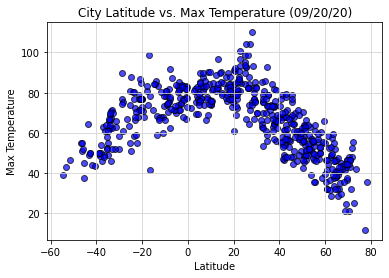

In [96]:
plt.scatter(cities_df["Latitude"],cities_df["Max Temp"],edgecolors="black",
            marker='o',color="blue",alpha=.7)
plt.title("City Latitude vs. Max Temperature (09/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Lat_vs_Max_Temp.png")

## Latitude vs. Humidity Plot

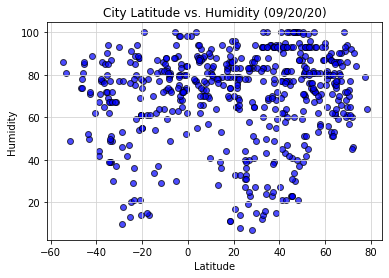

In [97]:
plt.scatter(cities_df["Latitude"],cities_df["Humidity"],edgecolors="black",
            marker='o', color="blue",alpha=.7)
plt.title("City Latitude vs. Humidity (09/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Lat_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

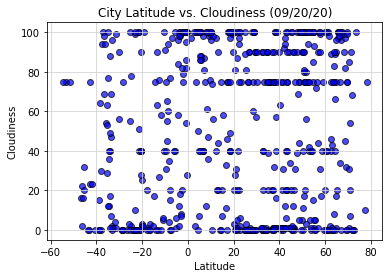

In [98]:
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness"],edgecolors="black",
            marker='o', color="blue",alpha=.7)
plt.title("City Latitude vs. Cloudiness (09/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Lat_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

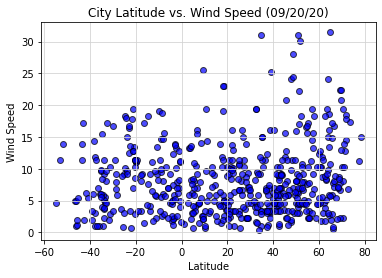

In [99]:
plt.scatter(cities_df["Latitude"],cities_df["Wind Speed"],edgecolors="black",
            marker='o', color="blue",alpha=.7)
plt.title("City Latitude vs. Wind Speed (09/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Lat_vs_Wind_Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

TypeError: unhashable type: 'numpy.ndarray'

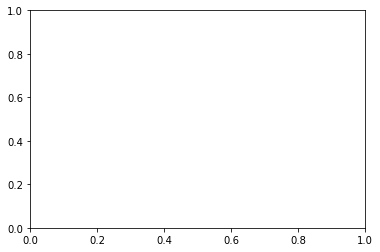

In [100]:
 = cities_df[cities_df['Humidity'] >= 100]

Calculating regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)

#Calc regression line to plot on chart
regress_values = x * slope + intercept
line_eq = f' y = {round(slope,2)} x = {round(intercept,2)}' 

plt.scatter(cities_df[cities_df['Latitude'] > 0],
            cities_df["Max Temp"],edgecolors="black",
            marker='o',color="blue",alpha=.7)
plt.title("City Latitude vs. Max Temperature (09/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Lat_vs_Max_Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


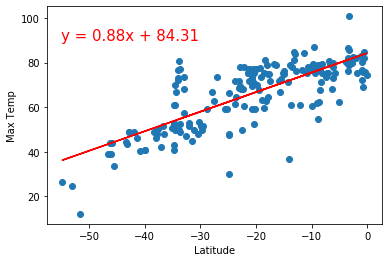

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


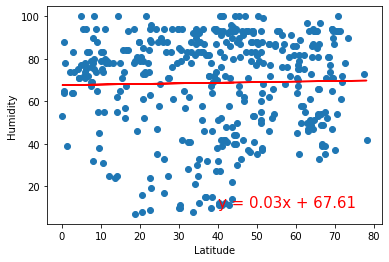

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


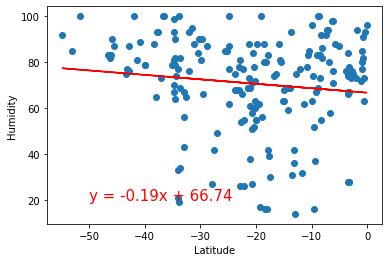

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


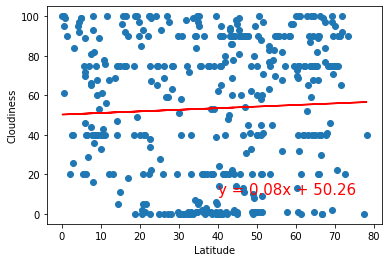

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


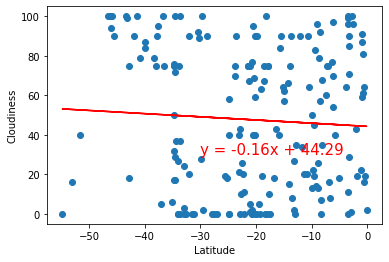

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


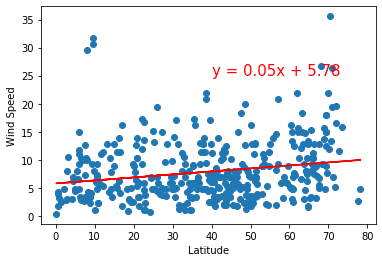

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


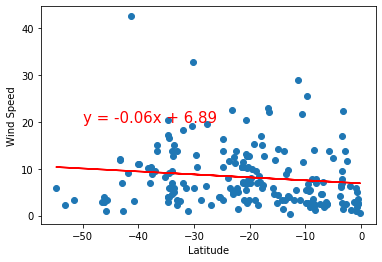